A rainplot is a visualization that combines half-density plots, jittered points, and boxplots. This combination is a transparent and intuitive form of visualization that provides an overview of the raw data, the probability density function, and key summary statistics at the same time.

This type of visualization gets the name because the half-density and the jittered points together look like a "raincloud".

This article uses the [ptitprince](https://github.com/pog87/PtitPrince) library, which already comes with [its own tutorial](https://github.com/pog87/PtitPrince/blob/master/tutorial_python/raincloud_tutorial_python.ipynb) on how to create and customize rainplots with a focus on the seaborn library. In contrast, this article is completely based on ptitprince and Matplotlib.

Let's get started by importing some libraries. 

In [1]:
# For the data
import palmerpenguins

import matplotlib.pyplot as plt
import numpy as np
import ptitprince as pt

Today we're gonna use the popular Palmer Penguins dataset which we have used in [other](https://www.python-graph-gallery.com/web-text-repel-with-matplotlib) [posts](https://www.python-graph-gallery.com/custom-legend-with-matplotlib) too.

In [2]:
# Drop missing values
penguins = palmerpenguins.load_penguins().dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


## Basic half-violin plot

The PtitPrince library makes it very easy to obtain half-violin plots with the function `half_violinplot`. We can a pandas data frame and the names of the variables for each axis, or simply the array of values. 

Obtaining a horizontal half-violin plot is as simple as passing the name of the numerical variable to `x` and the name of the categorical variable to `y`.

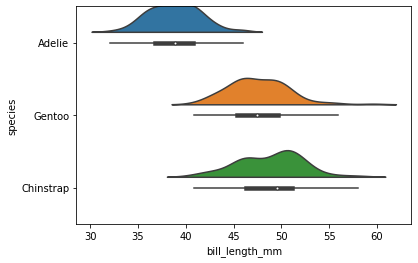

In [3]:
pt.half_violinplot(x="bill_length_mm", y="species", data=penguins);

If you change the order of the variables you obtain the vertical version of the same plot:

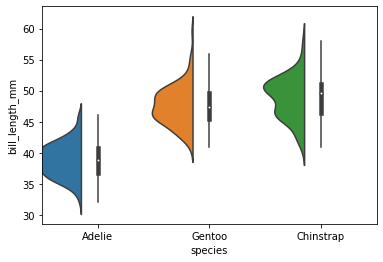

In [4]:
pt.half_violinplot(x="species", y="bill_length_mm", data=penguins);

## Getting started with out rainplot

Let's get started with our rainplot. One of the first things we do is defining creating lists to store the names of the species and the colors. The first is going to be used to subset the data frame, and colors ara matter of good-taste. A nice-looking palette of colors can make a simple plot much more attractive.

In [5]:
SPECIES = ["Adelie", "Gentoo", "Chinstrap"]
COLORS = ["#FF5A5F", "#FFB400", "#007A87"]

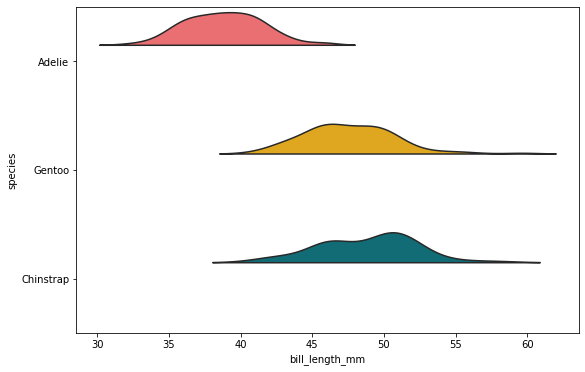

In [6]:
# Create our own Axes with custom size
fig, ax = plt.subplots(figsize=(9, 6))

# inner=None removes the default boxplot
# The 'width' argument allows us to scale the density
# We pass our color palette in the 'palette' argument

pt.half_violinplot(
    x="bill_length_mm", y="species", palette=COLORS, 
    inner=None, data=penguins, width=0.6, ax=ax
);

## Add rain

The rain, which is just another name for the mono-dimensional representation of the data points, is useful to identify potential outliers or other patterns. These points are jittered to reduce the overlap and obtain a clearer view of their distribution.

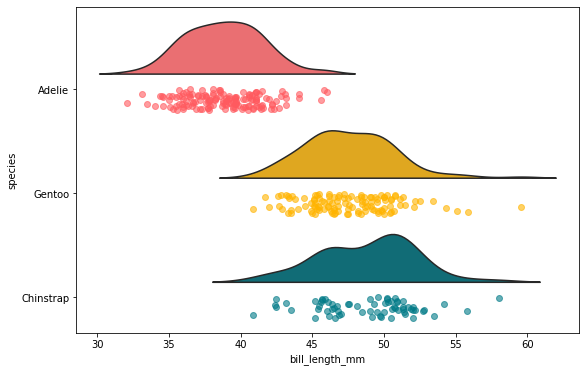

In [7]:
fig, ax = plt.subplots(figsize=(9, 6))

# Half-violin plot as above
pt.half_violinplot(
    x="bill_length_mm", y="species", palette=COLORS, 
    inner=None, data=penguins, width=1, ax=ax
)

# Iterate over the species
for i, species in enumerate(SPECIES):
    # Subset the data
    data = penguins[penguins["species"] == species]
    
    # Jitter the values on the vertical axis
    y = i + np.random.uniform(high=0.2, size=len(data))
    
    # Select the values of the horizontal axis
    x = data["bill_length_mm"]
    
    # Add the rain using the scatter method.
    ax.scatter(x, y, color=COLORS[i], alpha=0.6)

## Add boxplots

The last step of this process is to add a boxplot on top of the dots. This is helpful to quickly visualize the median and obtain clear bounds for the bulk of the distributions.

The boxplots are added with the `.boxplot()` method. This method expects to receive a list of arrays with the values for each group. If you're not very familiar with boxplots in Matplotlib [this](https://www.python-graph-gallery.com/web-ggbetweenstats-with-matplotlib) is going to be very helpful.

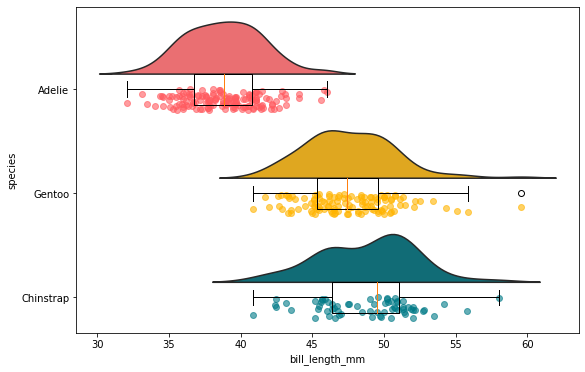

In [8]:
# Generate list of arrays
boxplot_data = [
    penguins[penguins["species"] == species]["bill_length_mm"].values 
    for species in SPECIES
]

# Vertical positions for the boxplots
POSITIONS = [0, 1, 2]

# vert=False means the boxplots are horizontal
# manage_ticks=False means adding the boxplot does not change the ticks already existing on the plot
ax.boxplot(boxplot_data, vert=False, positions=POSITIONS, manage_ticks=False)

fig

## Customize the raincloud plot

One problem with the boxplots above is that they are not aligned with the rain below. This last step consists of shifting the boxplots a little and customizing their appearance.

The following are two dictionaries with styles for the line representing the mean and the box.

In [9]:
# The style of the line that represents the median.
medianprops = {"linewidth": 1.5, "color": "#a9a9a9", "solid_capstyle": "butt"}
# The style of the box ... This is also used for the whiskers
boxprops = {"linewidth": 1.5, "color": "#a9a9a9"}

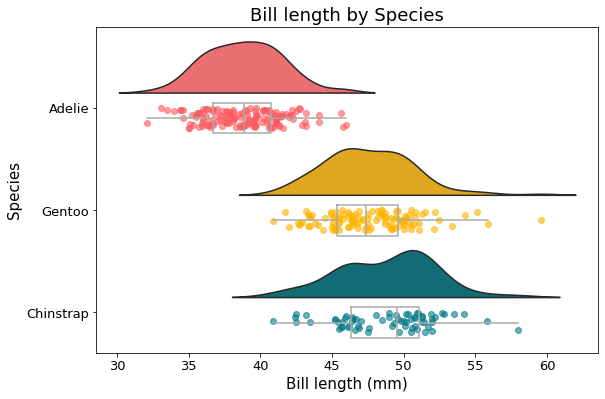

In [10]:
fig, ax = plt.subplots(figsize=(9, 6))

pt.half_violinplot(
    x="bill_length_mm", y="species", scale = "area", 
    palette=COLORS, inner=None, data=penguins, width=1,
    ax=ax
)

for i, species in enumerate(SPECIES):
    data = penguins[penguins["species"] == species]
    y = i + np.random.uniform(high=0.2, size=len(data))
    x = data["bill_length_mm"]
    ax.scatter(x, y, color=COLORS[i], alpha=0.6)

# Positions are shifted now
SHIFT = 0.1
POSITIONS = [0 + SHIFT, 1 + SHIFT, 2 + SHIFT]

ax.boxplot(
    boxplot_data, 
    vert=False, 
    positions=POSITIONS, 
    manage_ticks=False,
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Finally, add labels and a title
ax.set_xlabel("Bill length (mm)", fontsize=15)
ax.set_ylabel("Species", fontsize=15)
ax.set_title("Bill length by Species", fontsize=18)

# Change size of tick labels
ax.tick_params(labelsize=13)